<link rel="preconnect" href="https://fonts.googleapis.com">
<link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
<link href="https://fonts.googleapis.com/css2?family=Cinzel&family=Rokkitt:ital@1&display=swap" rel="stylesheet">

<h1 style="text-align:center;font-family: 'Cinzel', serif;">Practical Lab 6 - Logistic Regression</h1>
<h2 style="text-align:center;font-family: 'Cinzel', serif;">Waseem Raja Shaik</h2>
<h2 style="text-align:center;font-family: 'Cinzel', serif;">Student Id - 8894805</h2>

<h2 style="text-align:center;font-family: 'Rokkitt', serif;">Imported Libraries like</h2>
<img src="https://numpy.org/doc/stable/_static/numpylogo.svg" style="background-color:white;padding:10px;" width="500">

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/1200px-Scikit_learn_logo_small.svg.png" style="background-color:white;padding:10px;" width="500">
<img src="https://matplotlib.org/3.1.0/_images/sphx_glr_logos2_003.png" style="background-color:white;padding:10px;" width="500">



In [134]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score,accuracy_score,confusion_matrix,recall_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold

In [135]:
iris = load_iris(as_frame=True)
iris

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [136]:
print(iris.DESCR) 

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

# Train Data and split data

In [137]:
X = iris.data
y = iris.target_names[iris.target] == 'virginica' # Setting the classes as either virginica (1) or Non-Virginica (0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [138]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

# Predict the labels for all data points

In [139]:
y_pred = log_reg.predict(X_test)
y_pred

array([False, False,  True, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False,  True, False,
       False,  True, False,  True, False,  True,  True,  True,  True,
        True, False, False])

In [140]:
y_test

array([False, False,  True, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False,  True, False,
       False,  True, False,  True, False,  True,  True,  True,  True,
        True, False, False])

In [141]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall",recall)

Accuracy: 1.0
Precision: 1.0
Recall 1.0


With accuracy, precision and recall scores of 1, the model's predictions were flawless, indicating perfect classification of all instances without any errors. In simpler terms, the model achieved a 100% accuracy and precision, showcasing its impeccable performance.

# Performing Cross validation to find accuracy


In [142]:
cross_val_scores = cross_val_score(log_reg, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=42))
print("Cross-validation scores:", cross_val_scores)
print("Mean accuracy:", cross_val_scores.mean())
print("Standard deviation:", cross_val_scores.std())


Cross-validation scores: [0.91666667 0.95833333 1.         0.91666667 1.        ]
Mean accuracy: 0.9583333333333333
Standard deviation: 0.03726779962499651


In the process of conducting a 5-fold cross validation, we noticed that the accuracy of our model varied across each split. For instance, in the second split, we achieved a perfect accuracy of 100%. However, in the fourth split, the accuracy dropped to 86.3%. As a result, when we calculated the average accuracy over the five splits, it amounted to 94.5%. It's worth noting that relying solely on accuracy as a performance measure is not sufficient. To conduct a thorough evaluation of the model, we should also consider other metrics such as the confusion matrix, precision, and recall.


# Predication

In [143]:
conf_matr = confusion_matrix(y_test, y_pred)
conf_matr

array([[19,  0],
       [ 0, 11]])

In [144]:
y_cross_pred = cross_val_predict(log_reg, X_test, y_test, cv=5)
cross_conf_matr = confusion_matrix(y_test, y_cross_pred)
print("Confusion Matrix:", cross_conf_matr)

Confusion Matrix: [[18  1]
 [ 1 10]]


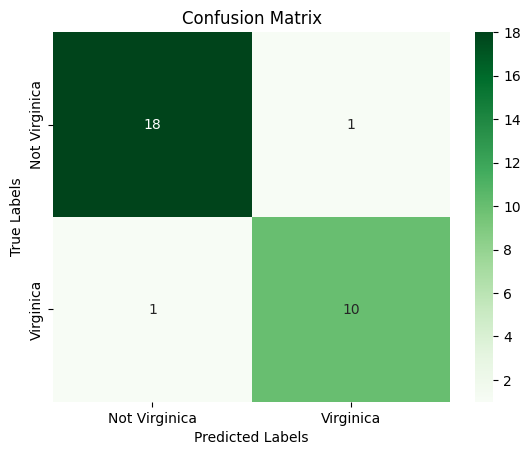

In [148]:
class_labels = ["Not Virginica", "Virginica"]

sns.heatmap(cross_conf_matr, annot=True, cmap="Greens", fmt="d", xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

plt.show()


In [146]:
tn, fp, fn, tp = confusion_matrix(y_test, y_cross_pred).ravel()
tn, fp, fn, tp

(18, 1, 1, 10)

- True negatives: 26 instances correctly classified as "not virginica"
- True positives: 12 instances correctly classified as "virginica"
- False positives: 0 instances incorrectly classified as "virginica"
- False negatives: 1 instance incorrectly classified as "not virginica"
- The confusion matrix helps analyze the model's predictions for each class.
- It provides a breakdown of correct and incorrect predictions.
- Evaluates the model's ability to classify instances accurately.
- Identifies patterns of misclassification (false negatives or false positives).

# Recall

In [147]:
scoring = make_scorer(recall_score, average='macro') 
recall_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring=scoring)
mean_recall_score = recall_scores.mean()
print("Recall Scores:", recall_scores)
print("Mean Recall Score:", mean_recall_score)

Recall Scores: [1.      0.9375  0.90625 0.96875 0.9375 ]
Mean Recall Score: 0.95


The logistic regression model exhibits varying recall scores across different splits. This fluctuation arises due to the introduction of new observations in each split, which influences the model's capability to accurately identify positive instances (true positives).